In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import multiprocessing as multi
import time

In [7]:
%%capture PC_name 
!hostname

**Setting notebook parameters**

In [8]:
#setting dots per inch for images
dpi = 120

#setting number of processors for multiprocessing
PC_name_str = PC_name.stdout[0:-2]

if (PC_name_str == 'arc10'or PC_name_str == 'science11' or 
        PC_name_str == 'science10'):
    cores = 42        
#     cores = multi.cpu_count()
    
else:
    cores = multi.cpu_count()

print(PC_name_str)
print(cores)

arc10
42


In [55]:
df_sdss_gals = pd.read_csv('../codes_for_SDSS/Data/SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_all_sky_Comov.csv',
                         index_col = 0)
df_sdss_gals.describe().apply(lambda s: s.apply('{0:.3f}'.format))

/vol/arc10/data1/amirza/Misc/anaconda/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,RA,DEC,Z,r_comov[Mpc],X_comov[Mpc],Y_comov[Mpc],Z_comov[Mpc]
count,1325735.000,1325735.000,1325735.000,1325735.000,1325735.000,1325735.000,1325735.000
mean,178.676,23.417,0.452,1757.113,-402.293,-50.546,660.839
std,92.194,18.180,0.157,557.464,1329.136,855.185,546.961
min,0.000,-10.997,0.000,0.022,-3378.717,-2920.029,-544.979
25%,135.845,8.361,0.347,1409.890,-1386.732,-665.693,208.113
50%,181.891,21.477,0.486,1900.086,-832.396,-22.369,573.208
75%,227.366,35.940,0.563,2155.089,796.933,565.573,1039.145
max,359.999,68.738,1.137,3721.922,3317.237,2869.830,3005.346


In [15]:
df_act_clus = pd.read_csv('Data/ACT_DR5_Clusters_Comov.csv', index_col = 0)
df_act_clus.describe()

,RADeg,decDeg,redshift,M500,r_comov,x_comov,y_comov,z_comov
count,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000
mean,151.193567,-11.682177,0.550965,2.621147,2050.633192,318.987671,219.616443,-382.659816
std,117.664528,24.306970,0.260175,1.092935,819.352266,1599.680360,1106.626053,892.947405
min,0.020896,-59.987040,0.035200,1.042072,154.676621,-4170.040899,-3524.075869,-3823.141694
25%,39.386235,-34.828811,0.354170,1.961358,1434.406287,-1091.760851,-524.758254,-984.745914
50%,144.342767,-2.252158,0.519816,2.361268,2012.598290,723.644358,259.891557,-67.613160
75%,232.604297,8.957936,0.709455,2.937229,2607.246878,1517.502717,992.884047,248.498785
max,359.988280,20.486048,1.910000,13.442958,5173.142447,4421.617253,3457.028008,1366.557544


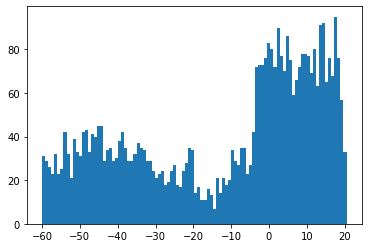

2307


In [87]:
%matplotlib inline
plt.hist(df_act_clus['decDeg'], bins = 100);
plt.show()
print(len(df_act_clus[df_act_clus['decDeg'] < 0]))

In [81]:
%matplotlib

dpi = 120

fig = plt.figure(dpi = dpi)
ax = fig.add_subplot(projection='3d')

no_gal_show = 5000
no_gal_show = len(df_act_clus)

df_sdss_gals_sample = df_sdss_gals.sample(n = no_gal_show, replace = False, 
                                               random_state = 0)  


ax.scatter(df_sdss_gals_sample['X_comov[Mpc]'], 
           df_sdss_gals_sample['Y_comov[Mpc]'], 
           df_sdss_gals_sample['Z_comov[Mpc]'],
           s = 0.2, alpha = 0.8, c = 'C0', label = 'SDSS galaxies');

ax.scatter(df_act_clus['x_comov'], 
           df_act_clus['y_comov'], 
           df_act_clus['z_comov'],
           s = 0.2, alpha = 0.8, c = 'C1', label = 'ACT clusters');

plt.legend(markerscale = 15)

ax.set_xlabel('X (Mpc)', labelpad = 4)
ax.set_ylabel('Y (Mpc)', labelpad = 8)
ax.set_zlabel('Z (Mpc)', labelpad = 8)

low_lim, high_lim = -4500, 4500
ax.set_xlim(low_lim, high_lim)
ax.set_ylim(low_lim, high_lim)
ax.set_zlim(low_lim, high_lim)

# plt.title('Distribution of ACT clusters and SDSS galaxies')

plt.show()

Using matplotlib backend: Qt5Agg


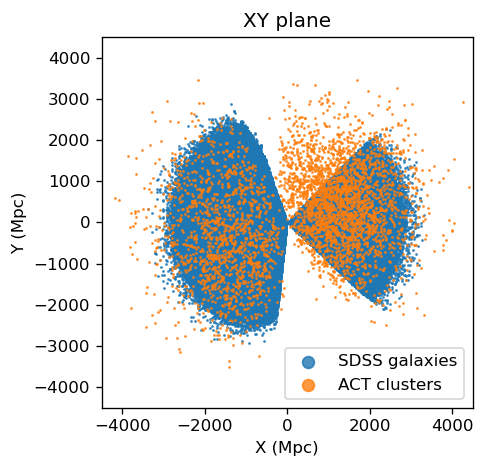

In [78]:
%matplotlib inline

plt.figure(dpi = dpi * 1)



plt.scatter(df_sdss_gals['X_comov[Mpc]'], 
            df_sdss_gals['Y_comov[Mpc]'],
            s = 0.5, alpha = 0.8, label = 'SDSS galaxies')
plt.scatter(df_act_clus['x_comov'], 
            df_act_clus['y_comov'],
            s = 0.5, alpha = 0.8, label = 'ACT clusters')

plt.legend(markerscale = 10)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -4500, 4500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('X (Mpc)')
plt.ylabel('Y (Mpc)')
plt.title('XY plane');



plt.tight_layout();

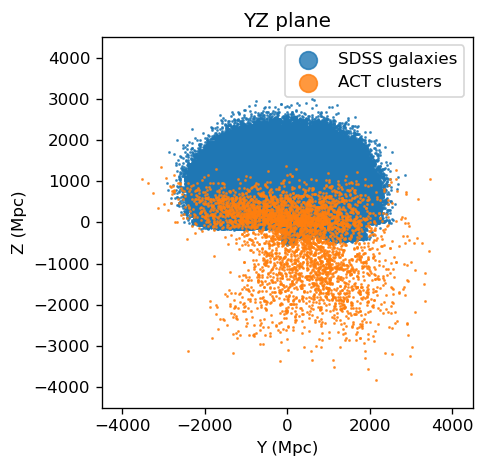

In [79]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))


plt.scatter(df_sdss_gals['Y_comov[Mpc]'], 
            df_sdss_gals['Z_comov[Mpc]'],
            s = 0.5, alpha = 0.8, label = 'SDSS galaxies')
plt.scatter(df_act_clus['y_comov'], 
            df_act_clus['z_comov'],
            s = 0.5, alpha = 0.8, label = 'ACT clusters')

plt.legend(markerscale = 15)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -4500, 4500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Y (Mpc)')
plt.ylabel('Z (Mpc)')
plt.title('YZ plane');


plt.tight_layout();

<ipython-input-80-fd38e98f8ce0>:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout();
/vol/arc10/data1/amirza/Misc/anaconda/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/vol/arc10/data1/amirza/Misc/anaconda/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


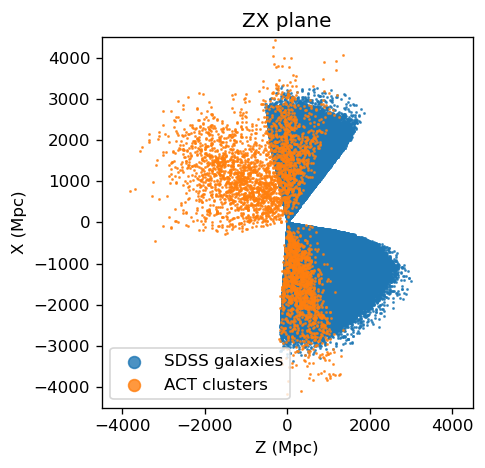

In [80]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))


plt.scatter(df_sdss_gals['Z_comov[Mpc]'], 
            df_sdss_gals['X_comov[Mpc]'],
            s = 0.5, alpha = 0.8, label = 'SDSS galaxies')
plt.scatter(df_act_clus['z_comov'], 
            df_act_clus['x_comov'],
            s = 0.5, alpha = 0.8, label = 'ACT clusters')

plt.legend(markerscale = 10)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -4500, 4500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Z (Mpc)')
plt.ylabel('X (Mpc)')
plt.title('ZX plane');


# plt.tight_layout();

In [57]:
min_common_dec = round(max(df_sdss_gals['DEC'].min(), df_act_clus['decDeg'].min()), 3)
print('Minimum common declination: ' + str(min_common_dec))

max_common_dec = round(min(df_sdss_gals['DEC'].max(), df_act_clus['decDeg'].max()), 3)
print('Minimum common declination: ' + str(max_common_dec))

print('\n')

max_common_redshift = round(min(df_sdss_gals['Z'].max(), df_act_clus['redshift'].max()), 3)
print('Maximum common redshift: ' + str(max_common_redshift))

Minimum common declination: -10.997
Minimum common declination: 20.486


Maximum common redshift: 1.137


In [25]:
%%time

radius = 250

df_act_clus_copy = df_act_clus.copy()

gals_num = []
inside_clus = []

for index, clus in df_act_clus_copy.iterrows():
    
    edge_gals = (df_sdss_gals[(df_sdss_gals['X_comov[Mpc]'] > (clus['x_comov'] + radius))].shape[0],
                 df_sdss_gals[(df_sdss_gals['X_comov[Mpc]'] < (clus['x_comov'] - radius))].shape[0],
                 df_sdss_gals[(df_sdss_gals['Y_comov[Mpc]'] > (clus['y_comov'] + radius))].shape[0],
                 df_sdss_gals[(df_sdss_gals['Y_comov[Mpc]'] < (clus['y_comov'] - radius))].shape[0],
                 df_sdss_gals[(df_sdss_gals['Z_comov[Mpc]'] > (clus['z_comov'] + radius))].shape[0],
                 df_sdss_gals[(df_sdss_gals['Z_comov[Mpc]'] < (clus['z_comov'] - radius))].shape[0])
        
    
    gals_num.append(edge_gals)
    
#     if 0 in edge_gals:
#         inside_clus.append(False)
#     else:
#         inside_clus.append(True)
    

    if index > 100:
        break
    


# df_act_clus['inside_clus'] = inside_clus
# df_act_clus['gals_beyond_250Mpc'] = gals_num

# print(gals_num)




CPU times: user 9.56 s, sys: 1.98 s, total: 11.5 s
Wall time: 11.2 s


In [58]:
def egde_gals_counter(clus, radius):
    
    edge_gals = (df_sdss_gals[(df_sdss_gals['X_comov[Mpc]'] > (clus['x_comov'] + radius))].shape[0],
                 df_sdss_gals[(df_sdss_gals['X_comov[Mpc]'] < (clus['x_comov'] - radius))].shape[0],
                 df_sdss_gals[(df_sdss_gals['Y_comov[Mpc]'] > (clus['y_comov'] + radius))].shape[0],
                 df_sdss_gals[(df_sdss_gals['Y_comov[Mpc]'] < (clus['y_comov'] - radius))].shape[0],
                 df_sdss_gals[(df_sdss_gals['Z_comov[Mpc]'] > (clus['z_comov'] + radius))].shape[0],
                 df_sdss_gals[(df_sdss_gals['Z_comov[Mpc]'] < (clus['z_comov'] - radius))].shape[0])
    
    
    if 0 in edge_gals:
        inside_clus = False
    else:
        inside_clus = True
        
    return (edge_gals, inside_clus)

In [99]:
clus_param = [(clus, radius) for i, clus in df_act_clus_copy.iterrows() if (i < 10)]
print(clus_param)

[(RADeg                 0.020896
decDeg              -38.626729
redshift              0.300599
M500                  1.683921
r_comov            1234.970995
x_comov             964.795514
y_comov               0.351871
z_comov            -770.923375
gals_in_250_Mpc    4387.000000
Name: 0, dtype: float64, 200), (RADeg                 0.061318
decDeg              -43.955645
redshift              0.878131
M500                  2.437253
r_comov            3081.580735
x_comov            2218.358881
y_comov               2.374109
z_comov           -2138.929186
gals_in_250_Mpc    4387.000000
Name: 1, dtype: float64, 200), (RADeg                 0.089905
decDeg              -28.091255
redshift              0.282570
M500                  2.700574
r_comov            1166.454241
x_comov            1029.043199
y_comov               1.614707
z_comov            -549.256755
gals_in_250_Mpc    4387.000000
Name: 2, dtype: float64, 200), (RADeg                 0.113536
decDeg               -1.044805
red

In [59]:
%%time

clus_inside_results = pd.DataFrame(columns=['Radius', 'Clusters'])

radius = 200

for radius in range(100, 400, 50):
    
    t = time.time()
    
    print(radius)

    clus_param = [(clus, radius) for i, clus in df_act_clus_copy.iterrows()]


    pool = multi.Pool(processes = cores)
    edge_info = pool.starmap(egde_gals_counter, clus_param)


#     edge_gals_list = [i[0] for i in edge_info]
    inside_clus_list = [i[1] for i in edge_info]


#     df_act_clus['inside_clus'] = inside_clus_list
#     df_act_clus['gals_beyond_250Mpc'] = edge_gals_list
    
#     no_of_inside_clus = sum(inside_clus_list)
    
    clus_inside_results = clus_inside_results.append({'Radius': radius,
                            'Clusters': sum(inside_clus_list)},
                            ignore_index=True)
    
    
    
    print('Time taken:', (time.time() - t)/60)
    print('\n')
    

clus_inside_results.head()

100
Time taken: 114.32976031303406


150
Time taken: 798.0941731929779


200
Time taken: 114.9264702796936


250
Time taken: 215.58896112442017


300
Time taken: 179.9128110408783


350
Time taken: 165.46942687034607


CPU times: user 18.7 s, sys: 13 s, total: 31.7 s
Wall time: 26min 28s


,Radius,Clusters
0,100,2564
1,150,2497
2,200,2416
3,250,2339
4,300,2270


In [60]:
clus_inside_results.to_csv('available_clusters_for_radius.csv', )

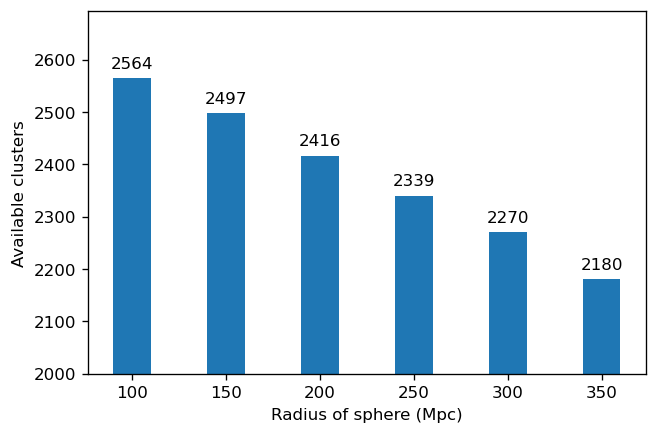

In [65]:
%matplotlib inline

plt.figure(dpi = dpi)

bar_out = plt.bar(clus_inside_results['Radius'], clus_inside_results['Clusters'], width = 20)
plt.xlabel('Radius of sphere (Mpc)')
plt.ylabel('Available clusters')
plt.ylim(2000,)

for i, row in clus_inside_results.iterrows():
    plt.text(row['Radius'], row['Clusters'] + 20, row['Clusters'],
            horizontalalignment = 'center')
    


In [86]:
df_act_clus['inside_clus'] = inside_clus
df_act_clus['gals_beyond_250Mpc'] = gals_num

df_act_clus.head()

,RADeg,decDeg,redshift,M500,r_comov,x_comov,y_comov,z_comov,gals_in_250_Mpc,inside_clus,gals_beyond_250Mpc
0,0.020896,-38.626729,0.300599,1.683921,1234.970995,964.795514,0.351871,-770.923375,4387.0,False,"(277232, 986928, 494498, 532439, 1325732, 0)"
1,0.061318,-43.955645,0.878131,2.437253,3081.580735,2218.358881,2.374109,-2138.929186,4387.0,False,"(5260, 1246403, 493375, 533478, 1325735, 0)"
2,0.089905,-28.091255,0.282570,2.700574,1166.454241,1029.043199,1.614707,-549.256755,4387.0,False,"(266298, 992495, 493786, 533089, 1321269, 0)"
3,0.113536,-1.044805,0.438800,1.493793,1736.957189,1736.664996,3.441354,-31.672153,4387.0,True,"(74400, 1100020, 492804, 534075, 983516, 5912)"
4,0.113978,-5.880626,0.201735,1.623578,850.514784,846.037292,1.683023,-87.140492,4387.0,True,"(296056, 977265, 493744, 533124, 1041795, 2185)"


In [87]:
print(sum(inside_clus))

2339
